# Forecasting Project using the BIKE SHARING DATASET

## Introduction
Welcome Techie!

So far you've learned how to explore, clean, and visualize data as well as how to implement supervised and unsupervised machine learning models. Congratulations!

In this notebook you are going to combine all these skills and knowledge to build a forecasting project for a bike sharing startup.

Start by watching the video below to recall which machine learning steps are important. 
Have fun!

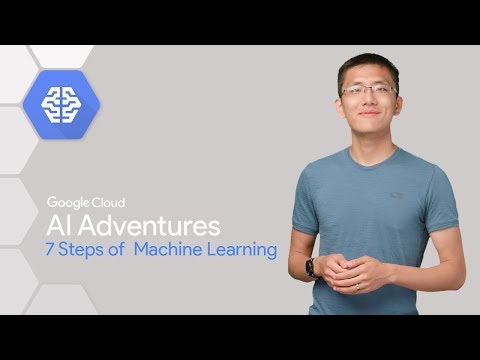

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('nKW8Ndu7Mjw', width=600, height=400)

This is a very helpful and good video which summarises steps of a machine learning project in a short and nice way.

But do you agree with everything in the video? Can we generalize every machine learning project into these steps? I don't want to critizes the video. I just want you to think critically.

It is hard to say do exactly these 7 things during a machine learning project and everything will work. All problems and also machine learning problems are contextual. Thus the common thing problems share are not the single steps and solutions but the questions that always come up.

As an example. Instead of saying "I have to randomize the data and split it into training and testing", ask "What is the best way to split my data?" We will see later why this is important.

The video also mostly described a classification problem but what if you have a regression problem? Can you use the same steps? We will uncover this question in this notebook since we have a regression problem at hand.

## Your experience
Briefly sketch out what do you think should be included into a data science project?  
Which steps are necessary? What did you learn so far during the online courses?  
You can write this here into the cell below or grab pen and paper (as I often do) and write down each step which you would add to a data science project.

## Learning Goals

It is time for you to implement your <b><font color='blue'>frist machine learning (ML) models</font></b> from skretch and practice what you have learnt so far. Additionally, the goal of this notebook is to introduce you to a <b><font color='blue'>Data Science Hypothesis Process</font></b> which you can use later for your own projects. This process will allow you to make data science projects repeatable by establishing a machine learning strategy instead of a machine learning snapshot.

The notebook is structured in such a way that you will go through a whole data science project. From a short data <b><font color='blue'>exporation</font></b> to data <b><font color='blue'>cleaning</font></b> and <b><font color='blue'>preparation</font></b> to <b><font color='blue'>formulating hypothesis** and **building ML models</font></b> which you then evaluate and refine.

After finishing this notebook you should feel more confident starting data science projects. You will know which questions/steps are important and relevant during a data science project and how to train and evaluate ML models. With this practice it will be easier for you to work with your team and solve your next data science problem.

Everything you will need to do will be inside of this notebook, and I've marked which cells you will need to edit by saying <b><font color='red'>"TODO! COMPLETE THIS SECTION!"</font></b>. Inside the cells you'll find `...`. These are the places where you have to add your code. 

## Practice with Bike Sharing dataset

Before you start make sure you read the README pdf file inside the unzipped folder.

Let's build a story and client problem around the dataset so that it feels more realistic and gives us a sense of solving a real world problem.

A Münster-based startup called LeezenShare is a bike sharing startup with five stores distributed around the city. Their bike sharing service is on the rise but recently they faced a wave of complaints from customers and employees. 

Most of the customers have two issues. Frist, they are reporting the stores at Hafenstraße and Königsweg don't have enough available bikes on the spot. Second, at store Weseler Str. where a lot of bikes are available they have to wait a very long time before an employee can help them. Employees on the other hand feel overwhelmed with the work at store Weseler Straße and are very stressed because of the amount of customers in the stores.

So the startup LeezenShare approached you the data scientist for help. They want to improve their customer and employee experience at their stores by making better decisions on how to distribute bikes across the stores. They want a forecasting system from you so that they now when and where bikes are needed. For the start they give you only the data of one store. You have to prove to them that you can build a forecasting system and help them at that one store.

Challenge accepted.

### import libraries
First import some libraries we need for some data exploration.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### first impression and informations to the dataset

First, load and explore the data before diving into the machine learning models. You have to get a feeling with what kind of data your are dealing with.

Import bike sharing dataset by loading the `bikesharing.csv` file.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [3]:
# Import the csv file using pandas
df = pd.read_csv('bikesharing.csv')

Check how many rows and columns the dataset has and display the first 5 rows.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [4]:
# output the shape of the data set
df.shape

(10886, 12)

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [5]:
# output the first five rows of the data set
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Now you see what columns and informations are available to you. Below you can find a more detailed description of the columns.

**Column discribtion**

- datetime: date + hourly time
- season: 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday: whether the day is considered a holiday 
  - 0: no holiday 
  - 1: holiday
- workingday
  - 0: no workingday
  - 1: workingday
- weather -
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: "feels like" temperature in Celsius
- humidity: relative humidity
- windspeed: wind speed
- casual: number of non-registered user rentals initiated
- registered: number of registered user rentals initiated
- count: number of total rentals (Dependent Variable)

We have to change a small thing before you do further explorations. The count column is the target column. But count as column name is a bad choise since a pandas method is also called .count(). Thus let's rename the count column to target.

In [6]:
df.rename(columns={'count': 'target'}, inplace=True)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,target
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Now that we have changed the column name, let's continue with the data exploration. Check the column types. Does the datetime column really contain datetime type of data?

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [7]:
# output the column types of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
target        10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


The columns are mostly of type integer or float. But the datetime columns is of type object even though it is suppose to be of type datetime. Thus change the datetime column to datetime type.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [8]:
# use a pandas method to change the type of the datetime column to datetime
df.datetime = pd.to_datetime(df.datetime)

Let's have a look again, if the datetime column has the right type now.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
target        10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


Perfect now the datetime column has the type datetime64[ns].

Since we have a unique timeseries, set the datetime column as index. 

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [10]:
# set the datetime column as index. Don't forget to use the inplace variable
df.set_index('datetime', inplace=True)

# this will just test if you set the index correct
message = (
    "You have to set the index inplace. The "
    "datetime columnn should only exist as "
    "an index and not as a column anymore.")
assert df.shape[1] == 11, message

Check how the data set looks with datetime as index

In [11]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,target
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Now find out what the date range of the data set is.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [12]:
# output the minimum datetime
df.index.min()

Timestamp('2011-01-01 00:00:00')

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [13]:
# output the maximum datetime
df.index.max()

Timestamp('2012-12-19 23:00:00')

As you found out we have approximately two years of data.

But do we have information on every single day and every single hour? This is very important for the machine learning models which you are going to implement. If no or only a few values are missing you can utilize the time series information perfectly by using models build explicitly for time series. But if you find out that the data contains a lot of missing values, you should select different machine learning models. Thus check if the data contains missing values in the form of nan values. 

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [14]:
# how many null/nan values do the columns have
df.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
target        0
dtype: int64

Nice. There are no null/nan values. But before we celebrate let's check if the data set contains every datetime in the date range you found.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [15]:
# create a list of datetimes starting from the minimum date of the dataset
# to the maximum date of the data set. 
idx = pd.date_range(df.index.min(), df.index.max(), freq='H')
assert len(idx) == 17256, "Did you set the frequency to hours?"

# reindex the data set and fill missing values with nan
df = df.reindex(idx, fill_value=pd.np.nan)

# get a list of datetimes where the target is nan
missing = df[df.target.isna()].index
message = (
    "Something went wrong. Check if you "
    "reindexed the data set correctly or if you "
    "selected the the nan target values correctly.")
assert len(missing) == 6370, message
missing

DatetimeIndex(['2011-01-02 05:00:00', '2011-01-03 02:00:00',
               '2011-01-03 03:00:00', '2011-01-04 03:00:00',
               '2011-01-05 03:00:00', '2011-01-06 03:00:00',
               '2011-01-07 03:00:00', '2011-01-11 03:00:00',
               '2011-01-11 04:00:00', '2011-01-12 03:00:00',
               ...
               '2012-11-30 14:00:00', '2012-11-30 15:00:00',
               '2012-11-30 16:00:00', '2012-11-30 17:00:00',
               '2012-11-30 18:00:00', '2012-11-30 19:00:00',
               '2012-11-30 20:00:00', '2012-11-30 21:00:00',
               '2012-11-30 22:00:00', '2012-11-30 23:00:00'],
              dtype='datetime64[ns]', length=6370, freq=None)

Ok we don't have the information for every single day and every single hour. How many percent of the data is missing?

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [16]:
len(missing) / len(df) * 100

36.914696337505795

Approximately 37%. That's a lot of missing data. Let's find out how many days are affected and how much data is missing at each day.

The dataset has missing values at 305 different days.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x105e56f28>]],
      dtype=object)

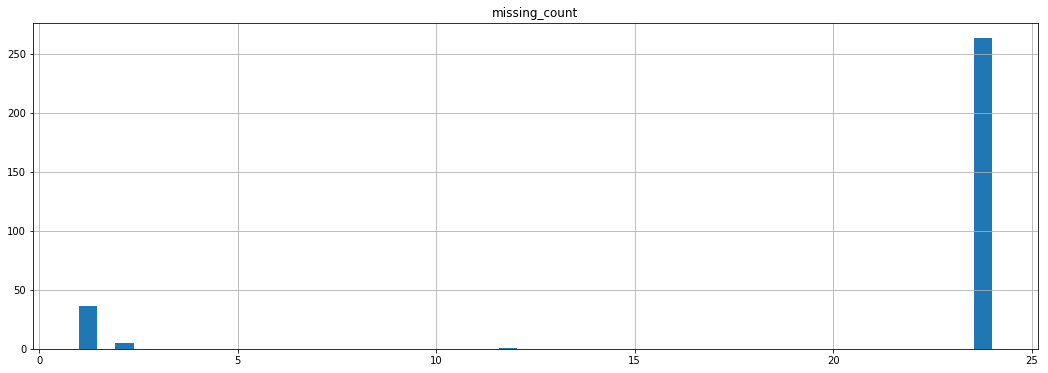

In [17]:
from collections import Counter

missing_dates = [x.date() for x in missing]
count = Counter(missing_dates)
missing_dates = pd.DataFrame(list(count.items()), columns=['date', 'missing_count'])
print('The dataset has missing values at ' + str(len(missing_dates)) + ' different days.')
missing_dates.hist(figsize=(18, 6), bins=50)

The data is missing on 305 days and most of the days are missing completely as you can see in the histogram plot (the largest bin is at 24).

Plot the time series target data to see more clearly when data is missing. Is it only missing at the start of the time series or at the end? Or is the data missing periodecally?

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

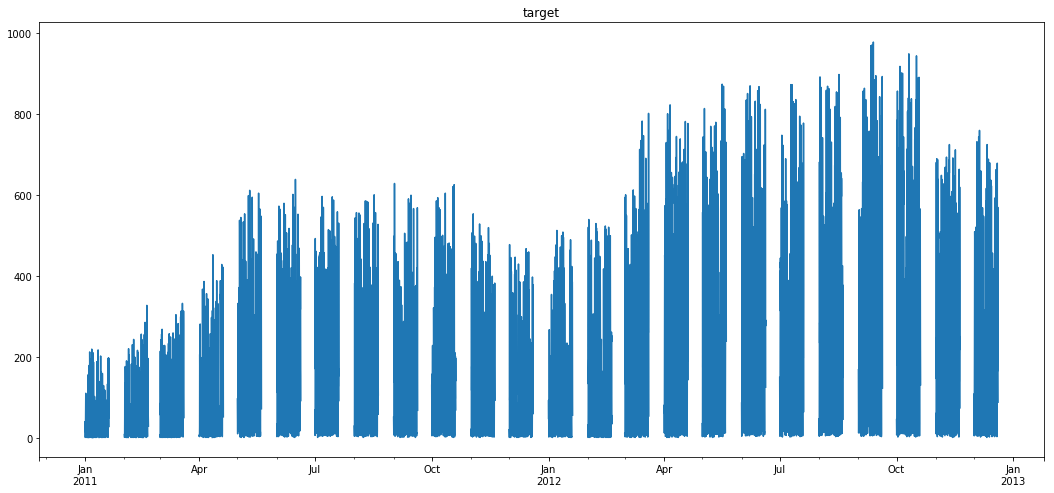

In [18]:
# plot the target column
df['target'].plot(figsize=(18, 8), title='target')

The data is missing frequently and in large intervalls. This is a big problem. Typically one can use time series models, like SARIMA or Prophet, for revenue forecasting to utilize the time dependency. But with this large gaps of missing data it is hard to use these models in a meaningful way.

But it is great to find this out so early. This eliminates certain type of models which means we have to relay on other models. And we have to consider this while engineering the features for our models (features like target of one week before will be difficult to engineer since we have a lot of missing data).

For machine leanring models it is better to use normally distributed data. Skewed data could cause problems for the machine learning model and therefore bad forecasting performance.

Check if the data is skewed by plotting a histogramm for the target.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

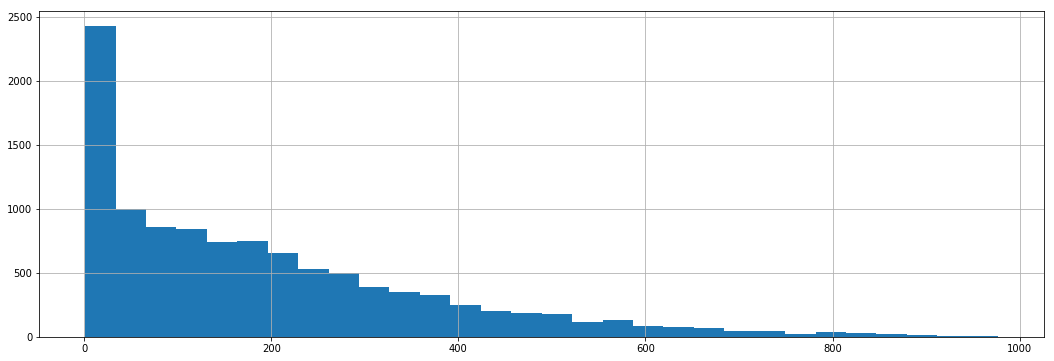

In [19]:
# make a histogram plot of the target column
df['target'].hist(figsize=(18, 6), bins=30)

Ok, the data looks skewed. This means we have to clean the data and fix the skewedness. 

All this steps you are doing are important for building a machine learning model. Thus I hope that you aren't frustrated that we haven't already started building the model. But the model part isn't that complicated and all this ground work you did until now will be included into the machine learning project you are going to build.

The next step will be our last task. After fixing and scaling the skewed data you will start with the Data Science Hypothesis Process.

### cleaning data

There are many different ways how you can fix skewed data. You can google "python fixing skewed data" and you will find different articles with methods and explanations. Here we will use the log-transform to make our data less skewed. 

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

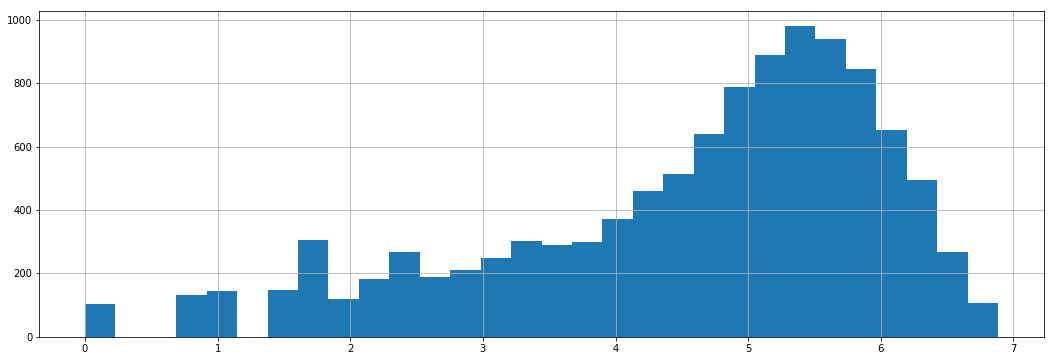

In [20]:
# use the log method from numpy to transfrom the target
df['norm_target'] = np.log(df.target)
df.norm_target.hist(figsize=(18, 6), bins=30)

Great. The data looks more like a normal distribution now. It is still skewed but ok, this is the best we can do for now. If you want feel free to google other transformations and try to fix the skewed data even more.

Besides transforming the data another important step is to scale the data. Do you remember why it is important from your online courses?

In the next step you will use the StandardScaler method from sklearn to scale the target. You will only scale the target value for now to see how it effects the values. Later during the machine learning models you will have to scale also other numerical feature columns so that the numerical values are all in the same range and your ML model doesn't favor certain features.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

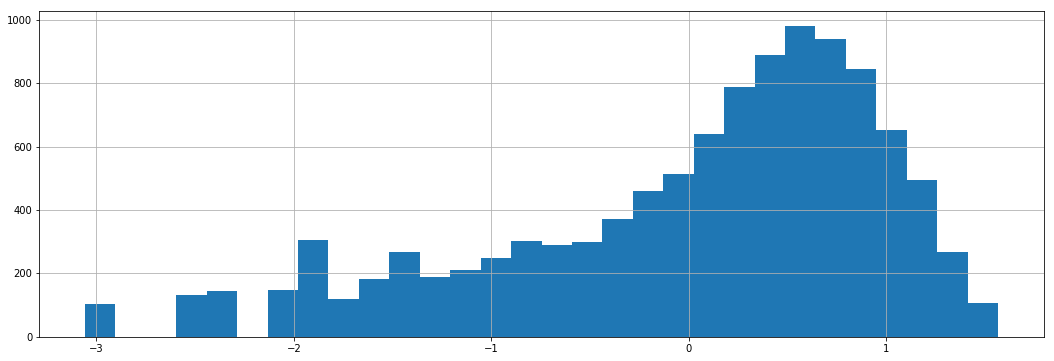

In [21]:
from sklearn.preprocessing import StandardScaler

# reload the data, because the StandardScaler cannot 
# handle nan values
df = pd.read_csv('bikesharing.csv')
df.rename(columns={'count': 'target'}, inplace=True)

# create a StandardScaler object
sc = StandardScaler()
df['norm_target'] = np.log(df['target'])
# fit transform the norm_target column
df['norm_target'] = sc.fit_transform(df[['norm_target']])
df.norm_target.hist(figsize=(18, 6), bins=30)

As you can see in the histogram plot the distribution didn't change at all. The scaling only shifted the distribution to values mostly around -1 and 1.

Now it is time for the Data Science Hypothesis Process and implementing machine learing models.

### Data Science Hypothesis Process - baseline model
Now we are going to start our data science hypothsis process. The idea of this process is to have a repeatable project process which you can use over and over again. The first step in this process is to **formulate a hypothesis**. After that it is time to **implement and test your hypothesis**. For this you have to engineer new features, implement a new model or what ever your hypothesis requires. After implementing everthing you have to **evaluate the hypothesis** and validate it or disprove it. Depending on the outcome you **refine your hypothesis or define a new one** and the process starts again. The idea of this process is to make fast itertions of your machine learning project, test new ideas and improve the model step by step.

To make use of this process you need to have a baseline model to which you can compare later hypothesis and results to. So let's build the baseline model.

All the steps you did until now are very important for your baseline model and later ML project steps. To make your machine leanring project repeatable and flexible you will first implement some of the steps above and new ones into functions so that you can use the functions over and over again. The different steps will include:

- loading data
- engineering features
- fixing skewed data
- generate dummy variables
- split feature and target
- split the data into training and testing sets
- scale target
- make the prediction and save it
- evaluate predictions

It is very important that you implement these steps into functions because we will use them in all hypothesis steps.

In the following you are also going to build your first baseline model in the **make predictions phase** with first simple features which you engineer in the  **engineering feature step**.

This was a lot of text, but I hope I could give you an idea on how the hypothesis process works and why it is important to build the first functions. Enough reading. Let's start.

#### Load data

Our first function will load the data and make first preparations. Implement the function in the following cell and run the function in the second cell below to see if it works. (Feel free to just scroll to the top and copy paste the things you already implemented). The asserts in the second cell are only to check if everything is implemented correctly.

From now on the frist cell is used to implement functions and in the second cell you will use these functions to build your machine learning project step by step.

Feel free to also create your own cells to test ideas before you implement them into the functions. Experiment a bit. But don't forget to delete those experiment cells again.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [22]:
def load_and_prepare_data():
    # load the bikesharing csv
    ts = pd.read_csv('bikesharing.csv')

    # rename count column to target
    ts.rename(columns={'count': 'target'}, inplace=True)

    # change the type of the datetime column to datetime
    ts['datetime'] = pd.to_datetime(ts.datetime)

    # set the datetime column as index
    ts.set_index('datetime', inplace=True)
    return ts

In [23]:
# load and prepare data
df = load_and_prepare_data()

assert 'target' in df.columns, "The target is missing."
assert 'count' not in df.columns, "Count is still in dataframe."
assert type(df.index) == pd.DatetimeIndex, "The datetime is not the index or not of type datetime"

df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,target
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Nice you implemented the first function. Now it's time to engineer some features for your ML model.

#### engineer  datatime features

Engineer the first features from the datetime information. You will focus only on the datetime features for now to build your first base model. Later you will formulate hypothesis to check if the other features can improve your model. 

In the second cell we will use the load_and_prepare_data funciton you implemented above and add the new functions to see if everything runs smoothly.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [24]:
def add_hours(ts):
    # get the hour information from the datetime index
    ts['hour'] = ts.index.hour
    return ts

def add_isodate(ts):
    # get the year, week and weekday information from the datetime index
    ts[['year', 'week', 'weekday']] = pd.DataFrame(
        ts.index.map(lambda x: x.isocalendar()).tolist(), index=ts.index)
    return ts

def add_month(ts):
    # get the month information from the datetime index
    ts['month'] = ts.index.month
    return ts

In [25]:
# load and prepare data
df = load_and_prepare_data()

# drop unnecessary columns
cols = ['season', 'holiday', 'workingday', 
        'weather', 'temp', 'atemp', 'humidity', 
        'windspeed', 'casual', 'registered']
df.drop(columns=cols, inplace=True)

# feature engineering
df = add_hours(df)
df = add_isodate(df)
df = add_month(df)

assert 'target' in df.columns, "The target columns is missing."
for col in ['hour', 'year', 'week', 'month', 'weekday']:
    assert col in df.columns, "The %s feature is missing." % col
assert len(df.columns) == 6, "You have to many columns in your dataframe."

df.head()

,target,hour,year,week,weekday,month
datetime,,,,,,
2011-01-01 00:00:00,16,0,2010,52,6,1
2011-01-01 01:00:00,40,1,2010,52,6,1
2011-01-01 02:00:00,32,2,2010,52,6,1
2011-01-01 03:00:00,13,3,2010,52,6,1
2011-01-01 04:00:00,1,4,2010,52,6,1


Great. Now that you have engineered some features, let's move on to fixing the skewed data.

#### fix skewed data

Earlier in the notebook we saw that the data is a bit skewed and you used the log-tansform to fix the skewed data. Now it is time to build this transformation into a function and add it as a next step into your project after loading the data and engineering features.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [26]:
def fix_skewed_data(ts):
    # use the numpy log transfrom method to transform the data
    ts['target'] = np.log(ts.target)
    return ts

In [27]:
# load and prepare data
df = load_and_prepare_data()

# drop columns
cols = ['season', 'holiday', 'workingday', 
        'weather', 'temp', 'atemp', 'humidity', 
        'windspeed', 'casual', 'registered']
df.drop(columns=cols, inplace=True)

# feature engineering
df = add_hours(df)
df = add_isodate(df)
df = add_month(df)

# transfrom to fix skewed data
df = fix_skewed_data(df)

assert len(df.columns) == 6, "You have to many columns. Did you create a new target column?"

df.head()

,target,hour,year,week,weekday,month
datetime,,,,,,
2011-01-01 00:00:00,2.772589,0,2010,52,6,1
2011-01-01 01:00:00,3.688879,1,2010,52,6,1
2011-01-01 02:00:00,3.465736,2,2010,52,6,1
2011-01-01 03:00:00,2.564949,3,2010,52,6,1
2011-01-01 04:00:00,0.000000,4,2010,52,6,1


Now you have a nice process where you first load the data, engineer some features and then fix the skewed data.

#### generate dummy variables

If you have categorical features, it is a good idea to create dummy variables for them. (If you don't remember what dummy variables are feel free to google it.)

Now one can argue if datetime features like for example month are really categorical features, since they contain time dependent information. On the other hand why should the model value December (12) more than January (1). It also depends on what model you are using. Are you using a regression model or a tree-based model.

The only way to find out if the normal features or the dummified features are the better choice is to test it. Therefore build a function that creates dummy variables out of feature columns.

Again, feel free to also create your own cells to test ideas before you implement them into the functions. Experiment a bit. But don't forget to delete those cells again.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [28]:
def generate_dummies(ts, cols, trap=False):
    # iterate over each column which you want to dummify
    for col in cols:
        # create dummy variables out of the column
        dummies = pd.get_dummies(ts[[col]].astype(str))
        # if trap is true we will drop one of the 
        # created dummies to avoid the dummy trap problem
        if trap:
            ts = ts.join(dummies.iloc[:, :-1])
        else:
            ts = ts.join(dummies)
    # drop the normal columns since you now have dummy variables
    ts.drop(columns=cols, inplace=True)
    return ts

In [29]:
# load and prepare data
df = load_and_prepare_data()

# drop columns
cols = ['season', 'holiday', 'workingday', 
        'weather', 'temp', 'atemp', 'humidity', 
        'windspeed', 'casual', 'registered']
df.drop(columns=cols, inplace=True)

# feature engineering
df = add_hours(df)
df = add_isodate(df)
df = add_month(df)

# transfrom to fix skewed data
df = fix_skewed_data(df)

# generate dummies
cols = ['hour', 'year', 'week', 'weekday', 'month']
df = generate_dummies(df, cols)

# assers will try to test if you implemented everything correctly
for col in cols:
    message = (
        "You have to drop the %s column because you created "
        "dummies now." % col)
    assert col not in df.columns, message
assert len(df.columns) == 93, "Either you have too many columns or you have too few."

df.head()

,target,hour_0,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2.772589,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,3.688879,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,3.465736,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,2.564949,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that you have successfully created dummy features we are closer to or machine learning model. The next to steps are to split the data set into features and targets and after that to split the data again into training and testing sets. 

#### split features and target

Split the dataframe into target and featurs dataframes so that you can train your machine learning model later.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [30]:
# load and prepare data
df = load_and_prepare_data()

# drop columns
cols = ['season', 'holiday', 'workingday', 
        'weather', 'temp', 'atemp', 'humidity', 
        'windspeed', 'casual', 'registered']
df.drop(columns=cols, inplace=True)

# feature engineering
df = add_hours(df)
df = add_isodate(df)
df = add_month(df)

# transfrom to fix skewed data
df['target'] = np.log(df.target)

# generate dummies
cols = ['hour', 'year', 'week', 'weekday', 'month']
df = generate_dummies(df, cols)

# split target and feature
# store the features in X and the target in y
X = df.loc[:, df.columns != 'target']
y = df.loc[:, ['target']]

# asserts are only here to test
assert type(X) == pd.DataFrame, "X should be a DataFrame."
assert type(y) == pd.DataFrame, "y should be a DataFrame."
assert 'target' not in X.columns, "The target columns shouldn't be in the feature dataframe X."
assert len(y.columns) == 1, "The target dataframe y should only include the target column."

display(X.head())
display(y.head())

,hour_0,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,target
datetime,
2011-01-01 00:00:00,2.772589
2011-01-01 01:00:00,3.688879
2011-01-01 02:00:00,3.465736
2011-01-01 03:00:00,2.564949
2011-01-01 04:00:00,0.000000


#### split the data into training and testing sets

After splitting the dataframe into target and features the next step is to split your datasets into training and testing.

In the video at the beginning of this notebook, the instructor said to randomize the data before splitting it into training and tests. This is correct for a lot of problem like classification problems or some regression problems but not for forecasting problems. Randomizing your data would break the time dependent structure and it could be that you have future information in your training set which your model shouldn't see.

Therefore you will pick a starting date (2012-08-01) and end date (7 days). The starting and end date are the intervalls for the testing dataset. The data before the start date will be the training dataset.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [31]:
# load and prepare data
df = load_and_prepare_data()

# drop columns
cols = ['season', 'holiday', 'workingday', 
        'weather', 'temp', 'atemp', 'humidity', 
        'windspeed', 'casual', 'registered']
df.drop(columns=cols, inplace=True)

# feature engineering
df = add_hours(df)
df = add_isodate(df)
df = add_month(df)

# transfrom to fix skewed data
df['target'] = np.log(df.target)

# generate dummies
cols = ['hour', 'year', 'week', 'weekday', 'month']
df = generate_dummies(df, cols)

# split target and feature
X = df.loc[:, df.columns != 'target']
y = df.loc[:, ['target']]

# save predictions in dataframe
preds = pd.DataFrame()

# pick the date interval for train and test
# the start date should be of type timestamp
# and should be the 2012-08-01 for now
start = pd.Timestamp('2012-08-01')
# add 7 days to the start date using pandas Timedelta
end = start + pd.Timedelta(7, unit='D')

# test a few things
assert type(start) == pd.Timestamp, "start is not of type timestamp"
assert type(end) == pd.Timestamp, "end is not of type timestamp"

# select train and test data
# select the train and test features
X_train = X[X.index < start]
X_test = X[(X.index >= start) & (X.index <= end)]

# select the train and test targets
y_train = y[y.index < start]
y_test = y[(y.index >= start) & (y.index <= end)]

Now display your dataframes. 

In [32]:
display(X_train.head())
display(X_test.head())

,hour_0,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,hour_0,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
datetime,,,,,,,,,,,,,,,,,,,,,
2012-08-01 00:00:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2012-08-01 01:00:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2012-08-01 02:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2012-08-01 03:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2012-08-01 04:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
display(y_train.head())
display(y_test.head())

,target
datetime,
2011-01-01 00:00:00,2.772589
2011-01-01 01:00:00,3.688879
2011-01-01 02:00:00,3.465736
2011-01-01 03:00:00,2.564949
2011-01-01 04:00:00,0.000000


,target
datetime,
2012-08-01 00:00:00,3.850148
2012-08-01 01:00:00,3.496508
2012-08-01 02:00:00,2.564949
2012-08-01 03:00:00,1.945910
2012-08-01 04:00:00,1.386294


You are so close to implementing the machine learning model. The last step left which seperates you from your machinen learning model is to scale the target data.

#### scale the target

It is always a good idea to scale all the numerical columns in your dataset so that your model doesn't favor some columns over others because they have larger values.

The only numerical column we have until now is the target column since we are dropping other columns like temperature for now and have only dummy features for our datetime features.

Scale the target values using the StandardScaler method from sklearn. 

While scaling it is important that you first fit your scaler on the training data. After you fitted the scaler on the training data use the same scaler to transform your test data. This is important because during real live forecasting you wouldn't know what your test target values are because the test target values are supposed to be future values. 

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [34]:
from sklearn.preprocessing import StandardScaler

def scale_targets(y_train, y_test):
    sc = StandardScaler()
    # fit and transfrom the target values of your train data
    y_train['target_sc'] = sc.fit_transform(y_train[['target']]) 
    
    # transfrom the targeet values of your test data
    # and save it as target_sc
    y_test['target_sc'] = sc.transform(y_test[['target']]) 
    
    # output the scaler and both training and testing datasets
    # you will need the scaler later to retransfrom your predictions 
    # back to real target values
    return sc, y_train, y_test

In [35]:
# load and prepare data
df = load_and_prepare_data()

# drop columns
cols = ['season', 'holiday', 'workingday', 
        'weather', 'temp', 'atemp', 'humidity', 
        'windspeed', 'casual', 'registered']
df.drop(columns=cols, inplace=True)

# feature engineering
df = add_hours(df)
df = add_isodate(df)
df = add_month(df)

# transfrom to fix skewed data
df['target'] = np.log(df.target)

# generate dummies
cols = ['hour', 'year', 'week', 'weekday', 'month']
df = generate_dummies(df, cols)

# split target and feature
X = df.loc[:, df.columns != 'target']
y = df.loc[:, ['target']]

# save predictions in dataframe
preds = pd.DataFrame()

# start forward test. pick date interval for train and test
start = pd.Timestamp('2012-08-01')
end = start + pd.Timedelta(7, unit='D')

# select train and test data
X_train = X[X.index < start]
X_test = X[(X.index >= start) & (X.index <= end)]

y_train = y[y.index < start]
y_test = y[(y.index >= start) & (y.index <= end)]

sc, y_train, y_test = scale_targets(y_train, y_test)

In [36]:
display(y_train.head())
display(y_test.head())

,target,target_sc
datetime,,
2011-01-01 00:00:00,2.772589,-1.119414
2011-01-01 01:00:00,3.688879,-0.506070
2011-01-01 02:00:00,3.465736,-0.655437
2011-01-01 03:00:00,2.564949,-1.258403
2011-01-01 04:00:00,0.000000,-2.975319


,target,target_sc
datetime,,
2012-08-01 00:00:00,3.850148,-0.398121
2012-08-01 01:00:00,3.496508,-0.634840
2012-08-01 02:00:00,2.564949,-1.258403
2012-08-01 03:00:00,1.945910,-1.672773
2012-08-01 04:00:00,1.386294,-2.047367


Great work. Now it's time to implement the machine learning model, train it and make first predictions.

#### make predictions and save them
You will you a simple DecisionTree Regressor as your first base model. If you are not familiar with DecisionTrees it's totally fine. During the online courses you learned how to implement a Linear Regressor. The DecisionTree follows the same implementation principles. That's the beauty of sklearn. 

If you need more information google "sklearn decision tree regressor" or check out this link from sklearn https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html where you can find the information on how to implement the model.

If you want to learn more about how DecisionTrees work check out this YouTube video https://www.youtube.com/watch?v=eKD5gxPPeY0 (The example in the video is a classification problem but it should give a small introduction on how decision trees work.)

Now:
1. implement the decision tree
2. fit you model on the training dataset
3. predict with your model using the test dataset
4. store the predictions in your y test dataset as prediction_sc (your model outputs scaled values because we trained it on scaled values)
5. rescale the predictions
6. retransfrom the predicitons (don't forget you implemented the log transfrom method to fix the skewed data. To get back to real values you have to retransform the log values.)

Everything below is what you have implemented so far. This is the whole project you build step by step.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [37]:
from sklearn.tree import DecisionTreeRegressor

# load and prepare data
df = load_and_prepare_data()

# drop columns
cols = ['season', 'holiday', 'workingday', 
        'weather', 'temp', 'atemp', 'humidity', 
        'windspeed', 'casual', 'registered']
df.drop(columns=cols, inplace=True)

# feature engineering
df = add_hours(df)
df = add_isodate(df)
df = add_month(df)

# transfrom to fix skewed data
df['target'] = np.log(df.target)

# generate dummies
cols = ['hour', 'year', 'week', 'weekday', 'month']
df = generate_dummies(df, cols)

# split target and feature
X = df.loc[:, df.columns != 'target']
y = df.loc[:, ['target']]

# save predictions in dataframe
preds = pd.DataFrame()

# start forward test. pick date interval for train and test
start = pd.Timestamp('2012-08-01')
end = start + pd.Timedelta(7, unit='D')

# select train and test data
X_train = X[X.index < start]
X_test = X[(X.index >= start) & (X.index <= end)]

y_train = y[y.index < start]
y_test = y[(y.index >= start) & (y.index <= end)]

sc, y_train, y_test = scale_targets(y_train, y_test)

# create a decision tree regressor model
reg = DecisionTreeRegressor()
# fit the model using the training dataset
# don't forget to train the model on the scaled target (target_sc)
reg.fit(X_train, y_train[['target_sc']])

# make predictions using the test features
pred = reg.predict(X_test)

# add pred to y_test
y_test['prediction_sc'] = pred

# rescale and retransfrom predictions
y_test['prediction'] = sc.inverse_transform(y_test[['prediction_sc']])

# rescale the target and the prediction values so that 
# we have our real values back
y_test['target'] = np.exp(y_test.target)
y_test['prediction'] = np.exp(y_test.prediction)

y_test.head()

,target,target_sc,prediction_sc,prediction
datetime,,,,
2012-08-01 00:00:00,47.0,-0.398121,-0.523018,39.0
2012-08-01 01:00:00,33.0,-0.634840,-1.162614,15.0
2012-08-01 02:00:00,13.0,-1.258403,-2.047367,4.0
2012-08-01 03:00:00,7.0,-1.672773,-2.239934,3.0
2012-08-01 04:00:00,4.0,-2.047367,-1.775958,6.0


Congratulations you did your first predictions. Great work. 

Now it is time to evaluate the predictions. How good is your model?

From now on you will copy-paste your whole code from above and add or change a few things.

#### evaluate the prediction

Let's define an error metric to evaluate the performance of our forecasting model. There are a lot of different error metrics we can use but a simple and straight forward metric is the MAPE metric which is implemented below.

In [38]:
def calculate_mape(y, y_hat):
    perc_err = (100 * (y - y_hat)) / y
    return pd.np.mean(abs(perc_err))

Copy your project code from above and past it here above the calculate_mape function and run the cell

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [39]:
from sklearn.tree import DecisionTreeRegressor

# load and prepare data
df = load_and_prepare_data()

# drop columns
cols = ['season', 'holiday', 'workingday', 
        'weather', 'temp', 'atemp', 'humidity', 
        'windspeed', 'casual', 'registered']
df.drop(columns=cols, inplace=True)

# feature engineering
df = add_hours(df)
df = add_isodate(df)
df = add_month(df)

# transfrom to fix skewed data
df['target'] = np.log(df.target)

# generate dummies
cols = ['hour', 'year', 'week', 'weekday', 'month']
df = generate_dummies(df, cols)

# split target and feature
X = df.loc[:, df.columns != 'target']
y = df.loc[:, ['target']]

# save predictions in dataframe
preds = pd.DataFrame()

# start forward test. pick date interval for train and test
start = pd.Timestamp('2012-08-01')
end = start + pd.Timedelta(7, unit='D')

# select train and test data
X_train = X[X.index < start]
X_test = X[(X.index >= start) & (X.index <= end)]

y_train = y[y.index < start]
y_test = y[(y.index >= start) & (y.index <= end)]

sc, y_train, y_test = scale_targets(y_train, y_test)

reg = DecisionTreeRegressor()
reg.fit(X_train, y_train[['target_sc']])

pred = reg.predict(X_test)

# add pred to y_test
y_test['prediction_sc'] = pred

# rescale and retransfrom predictions
y_test['prediction'] = sc.inverse_transform(y_test[['prediction_sc']])
y_test['target'] = np.exp(y_test.target)
y_test['prediction'] = np.exp(y_test.prediction)

mape = calculate_mape(y_test.target, y_test.prediction)
print(mape)

22.090786424957685


The MAPE should be approx. `20.83`. 

Now define a plot function which you can use to visualize the target and predictions, and the error (difference between target and predictions).

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [40]:
def plot_error(ts):
    # create two plot.
    # the first plot should show the target (blue) and the prediction (green)
    # the second plot should show the error (predicton - target)
    fig = plt.figure(figsize=(16, 10))
    layout = (2, 1)
    ax_rev = plt.subplot2grid(layout, (0, 0))
    ax_err = plt.subplot2grid(layout, (1, 0))

    ts.target.plot(ax=ax_rev, color='b', alpha=0.8)
    ts.prediction.plot(ax=ax_rev, color='g', alpha=0.8)

    ts['error'] = ts.prediction - ts.target

    ts.error.plot(ax=ax_err, color='r', alpha=0.8)
    
    ax_rev.legend()
    ax_err.legend()
    plt.tight_layout()

Copy your project code from above (including the MAPE calculation) and past it here above the plot_error function and run the cell

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

20.947288198287698


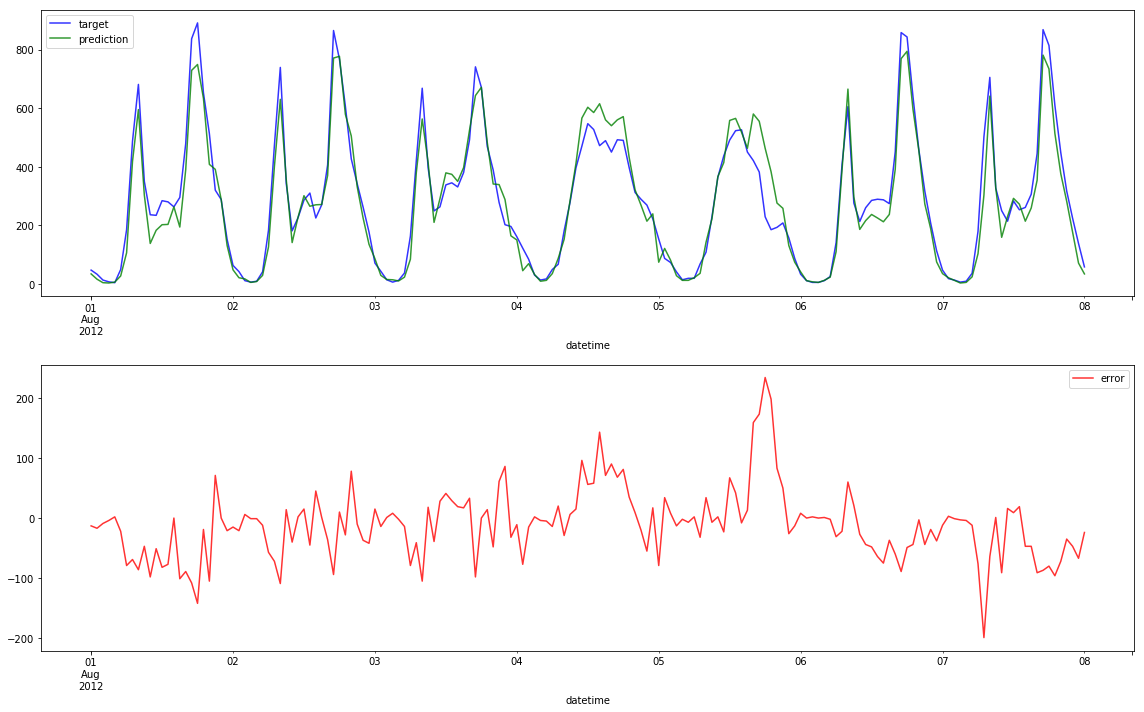

In [41]:
from sklearn.tree import DecisionTreeRegressor

# load and prepare data
df = load_and_prepare_data()

# drop columns
cols = ['season', 'holiday', 'workingday', 
        'weather', 'temp', 'atemp', 'humidity', 
        'windspeed', 'casual', 'registered']
df.drop(columns=cols, inplace=True)

# feature engineering
df = add_hours(df)
df = add_isodate(df)
df = add_month(df)

# transfrom to fix skewed data
df['target'] = np.log(df.target)

# generate dummies
cols = ['hour', 'year', 'week', 'weekday', 'month']
df = generate_dummies(df, cols)

# split target and feature
X = df.loc[:, df.columns != 'target']
y = df.loc[:, ['target']]

# save predictions in dataframe
preds = pd.DataFrame()

# start forward test. pick date interval for train and test
start = pd.Timestamp('2012-08-01')
end = start + pd.Timedelta(7, unit='D')

# select train and test data
X_train = X[X.index < start]
X_test = X[(X.index >= start) & (X.index <= end)]

y_train = y[y.index < start]
y_test = y[(y.index >= start) & (y.index <= end)]

sc, y_train, y_test = scale_targets(y_train, y_test)

reg = DecisionTreeRegressor()
reg.fit(X_train, y_train[['target_sc']])

pred = reg.predict(X_test)

# add pred to y_test
y_test['prediction_sc'] = pred

# rescale and retransfrom predictions
y_test['prediction'] = sc.inverse_transform(y_test[['prediction_sc']])
y_test['target'] = np.exp(y_test.target)
y_test['prediction'] = np.exp(y_test.prediction)

mape = calculate_mape(y_test.target, y_test.prediction)
print(mape)

plot_error(y_test)

Your output should look something like this 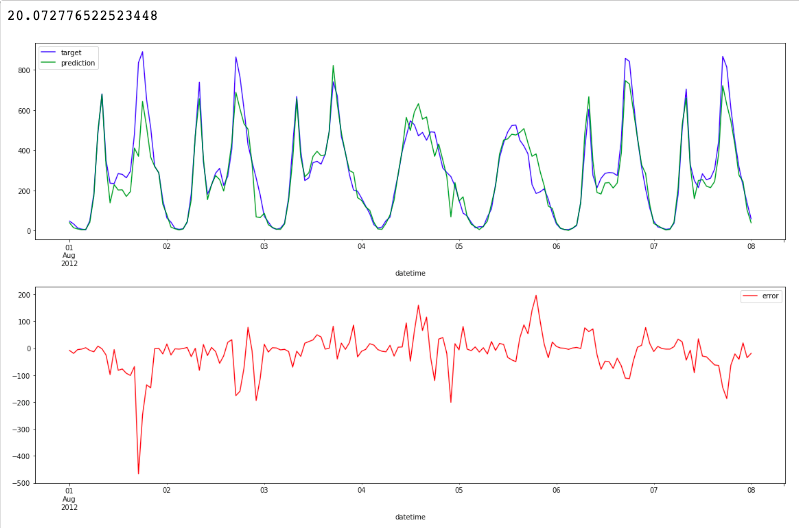:

Good work! You built a nice code structure to make predictions and to evaluate them. The target follows a certain pattern with two repeating peaks from day to day and your model was able to predict them accurately most of the time. Your model even predicted the two days which don't follow the two peak pattern.

The next step would be to test multiple prediction windows not only from 2012-08-01 until 2012-08-08. This method is called forward-testing (or back-testing) and it is the equvivalent to a cross validation method you would normally use. Forward-testing is typically used to evaluate forecasting systems.

The forward-testing method isn't available like cross validation in sklearn. Thus we would have to implement it ourselfs. But the implementation is out of scope of this notebook. If you are still interested on how the forward-testing can be implemented, let me know or feel free to google it and built it yourself. 

Now that you have a nice code structure it is time for our first hypothesis and to improve your forecasting project.

### Data Science Hypothesis Cycle 1 - Random Forest

After training and defining our baseline with the decision tree model and the datetime feature, it is time to improve the model. We will do this by defining a hypothesis and proving or disproving the hypothesis. We want to improve the forecasting perfomace iteration by iteration, which also means if you disprove a hypothesis and your forecasting system didn't improve it is totally fine.

In this first round we will try to improve the forecasting performance with a more complicated model (only the model itself is a bit more sophisticated. The implementation follows the same pattern with .fit and .predict so it is as easy as before). 

As base model you used the DecisionTree, now we want to improve the model performance by using multiple DecisionTrees. The model with multiple DecisionTrees is called RandomForest. 

____
#### Hypothesis
The forecasting performance will improve with a model upgrade from DecisionTree to RandomForest.
___

Copy your latest code structure with the evaluation step in it and replace the decision tree with a ramdom forest model.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

/Users/kemaltekce/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/kemaltekce/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


18.234952678071373


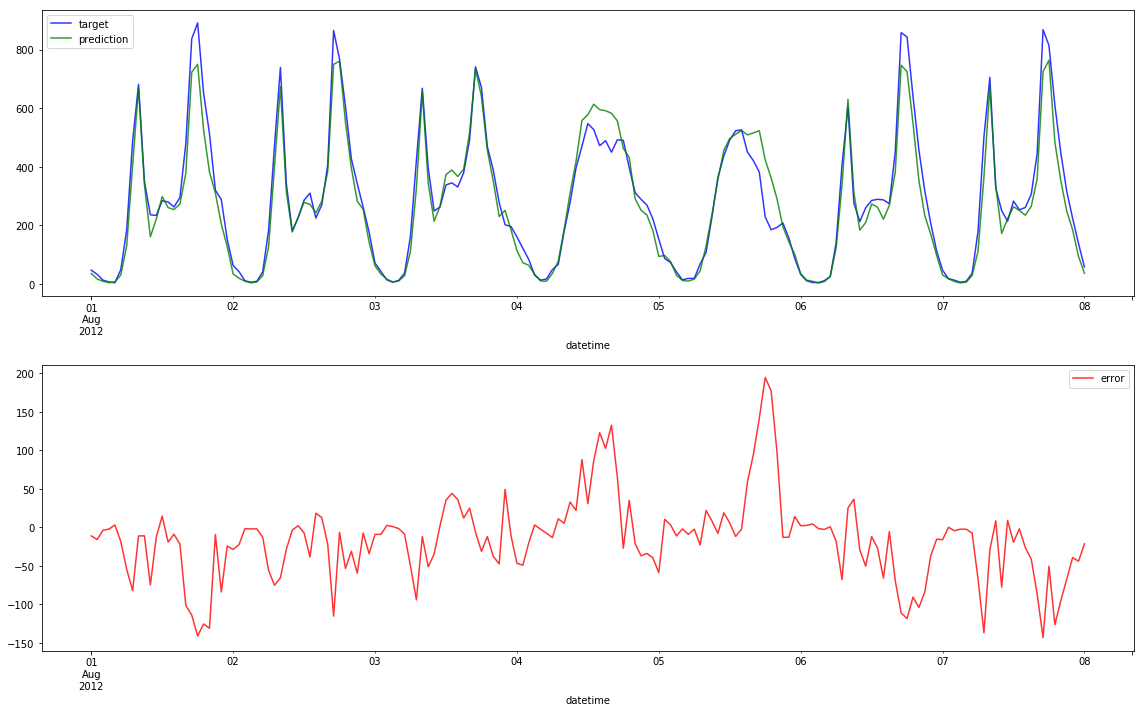

In [42]:
from sklearn.ensemble import RandomForestRegressor

# load and prepare data
df = load_and_prepare_data()

# drop columns
cols = ['season', 'holiday', 'workingday', 
        'weather', 'temp', 'atemp', 'humidity', 
        'windspeed', 'casual', 'registered']
df.drop(columns=cols, inplace=True)

# feature engineering
df = add_hours(df)
df = add_isodate(df)
df = add_month(df)

# transfrom to fix skewed data
df['target'] = np.log(df.target)

# generate dummies
cols = ['hour', 'year', 'week', 'weekday', 'month']
df = generate_dummies(df, cols)

# split target and feature
X = df.loc[:, df.columns != 'target']
y = df.loc[:, ['target']]

# save predictions in dataframe
preds = pd.DataFrame()

# start forward test. pick date interval for train and test
start = pd.Timestamp('2012-08-01')
end = start + pd.Timedelta(7, unit='D')

# select train and test data
X_train = X[X.index < start]
X_test = X[(X.index >= start) & (X.index <= end)]

y_train = y[y.index < start]
y_test = y[(y.index >= start) & (y.index <= end)]

sc, y_train, y_test = scale_targets(y_train, y_test)

reg = RandomForestRegressor()
reg.fit(X_train, y_train[['target_sc']])

pred = reg.predict(X_test)

# add pred to y_test
y_test['prediction_sc'] = pred

# rescale and retransfrom predictions
y_test['prediction'] = sc.inverse_transform(y_test[['prediction_sc']])
y_test['target'] = np.exp(y_test.target)
y_test['prediction'] = np.exp(y_test.prediction)

mape = calculate_mape(y_test.target, y_test.prediction)
print(mape)

plot_error(y_test)

You improved the model performance from `20.07` to `19.24` and thus proved your first hypothesis. (Keep in mind the ideal way of testing a hypothesis would be by using the forward testing method).

Let's formulate the  next hypothesis.

### Data Science Hypothesis Cycle 2 - Season feature 

Now let's add an additional feature, the season feature, to your model and see if the forecasting performance can be further improved.

Before randomly adding the feature, let's make a quick visualization to see if the season feature could be a relevant feature.

Text(0.5,1,'Grouped target for of each season vs day in month')

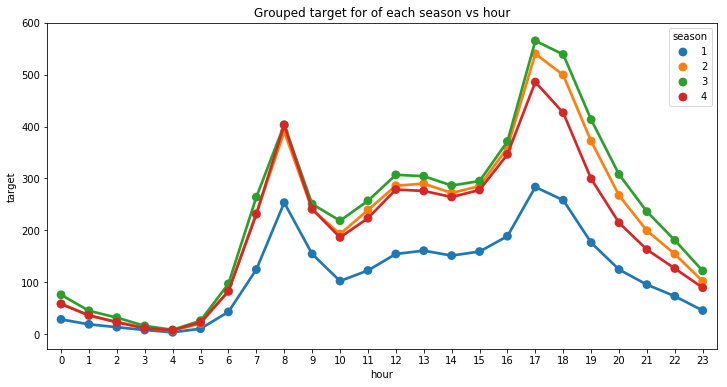

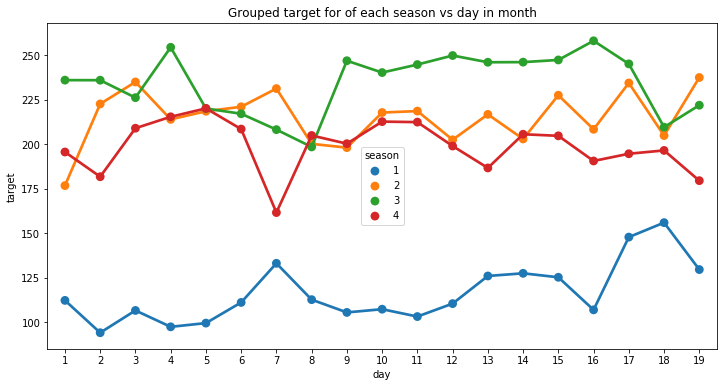

In [43]:
df = load_and_prepare_data()
df = df[['season', 'target']]
df['hour'] = df.index.hour
df['day'] = df.index.day

hourly = df[['hour', 'season', 'target']].groupby(
    ['hour', 'season']).mean().reset_index()
daily = df[['day', 'season', 'target']].groupby(
    ['day', 'season']).mean().reset_index()

plt.figure(figsize=(12, 6))
sns.pointplot(
    x=hourly['hour'], y=hourly['target'], 
    hue=hourly['season'], data=hourly)
plt.title("Grouped target for of each season vs hour")

plt.figure(figsize=(12, 6))
sns.pointplot(
    x=daily['day'], y=daily['target'], 
    hue=daily['season'], data=daily)
plt.title("Grouped target for of each season vs day in month")

This quick visualization shows us that the spring season (1) has a lower count of rented bikes. Thus the season feature could improve our model by separating the spring season better from the other seasons.

___
#### Hypothesis
The season feature will improve the model performance because the spring season has a lower count of rented bikes.
___

Let's try it out. Implement a season feature into your forecasting system.

Copy the code from where you implemented the RandomForestRegression model.

Remove the season column from the drop columns list so that the season feature is available for your model. Also don't forget to generate dummy variables for the season feature. Add the season feature to the column list for which you generate dummy variables.

Finally run the code again and check if you could improve the model performance even further.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

/Users/kemaltekce/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


15.853644119520355


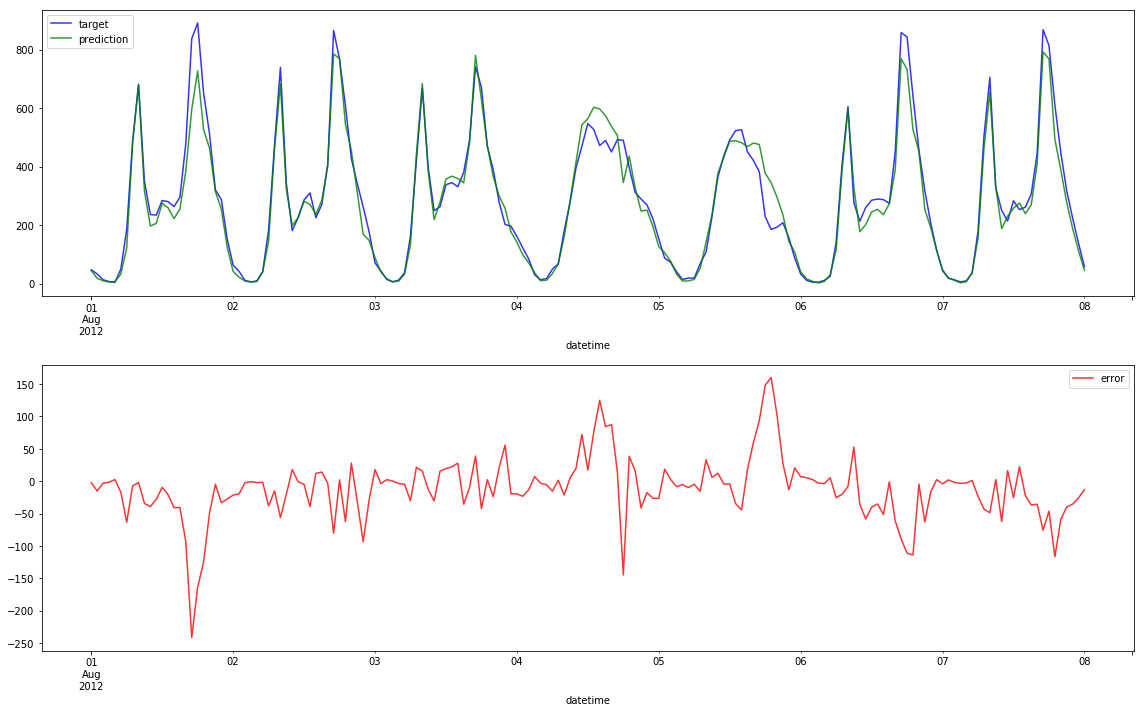

In [44]:
from sklearn.ensemble import RandomForestRegressor

# load and prepare data
df = load_and_prepare_data()

# drop columns
cols = ['holiday', 'workingday', 
        'weather', 'temp', 'atemp', 'humidity', 
        'windspeed', 'casual', 'registered']
df.drop(columns=cols, inplace=True)

# feature engineering
df = add_hours(df)
df = add_isodate(df)
df = add_month(df)

# transfrom to fix skewed data
df['target'] = np.log(df.target)

# generate dummies
cols = ['hour', 'year', 'week', 'weekday', 'month', 'season']
df = generate_dummies(df, cols)

# split target and feature
X = df.loc[:, df.columns != 'target']
y = df.loc[:, ['target']]

# save predictions in dataframe
preds = pd.DataFrame()

# start forward test. pick date interval for train and test
start = pd.Timestamp('2012-08-01')
end = start + pd.Timedelta(7, unit='D')

# select train and test data
X_train = X[X.index < start]
X_test = X[(X.index >= start) & (X.index <= end)]

y_train = y[y.index < start]
y_test = y[(y.index >= start) & (y.index <= end)]

sc, y_train, y_test = scale_targets(y_train, y_test)

reg = RandomForestRegressor()
reg.fit(X_train, y_train[['target_sc']])

pred = reg.predict(X_test)

# add pred to y_test
y_test['prediction_sc'] = pred

# rescale and retransfrom predictions
y_test['prediction'] = sc.inverse_transform(y_test[['prediction_sc']])
y_test['target'] = np.exp(y_test.target)
y_test['prediction'] = np.exp(y_test.prediction)

mape = calculate_mape(y_test.target, y_test.prediction)
print(mape)

plot_error(y_test)

The season feature improved the model from `19.23` to `16.94` for this one week. Hypothesis proved. 

Let's try out another feature in our next hypothesis.

### Data Science Hypothesis Cycle 3 - Temperature feature

Now let's include a numerical feature into our model. Logically it makes sense that more bikes are rented if the weather is nicer. Therefore let's see if a temperature feature can improve the model.

But again before just throwing the feature at the model, we will check if the temperature correlates with our target value (count of rented bikes).

Calculate the correlation between the temperature and the target.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

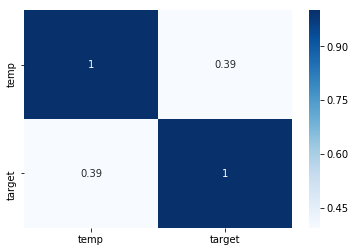

In [45]:
df = load_and_prepare_data()
# calculate the correlation (if you don't know how google "pandas correlation")
corr = df[['temp', 'target']].corr()
sns.heatmap(corr, cmap='Blues', annot=corr)

The correlation plot shows a positive correlation between the target and temperature. Thus the temperature feature could improve our model.

___
#### Hypothesis
People are renting more bikes at higher temperatures. Thus a temperature feature will improve our model.
___

Keep in mind that you have to scale the temperature data after you split the data into train and test sets.

First, build a new function that scales the training data by fitting and transforming it and scales the test data afterwards by using the scaler, which was fitted on the traing data set.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [46]:
def scale_feature(train, test, col):
    sc = StandardScaler()
    # fit and transfrom train[[col]]
    train[col] = sc.fit_transform(train[[col]]) 
    
    # transfrom the test data
    test[col] = sc.transform(test[[col]]) 
    return train, test

Again copy and paste your last forecasting code from where you implemented the season feature.

Add your new function (`scale_feautre`) after the target scaler function (`scale_targets`). Don't forget to remove the temp column from the list of dropped columns and input the temp column name into your `scale_feature` function.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

/Users/kemaltekce/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


16.610303099042415


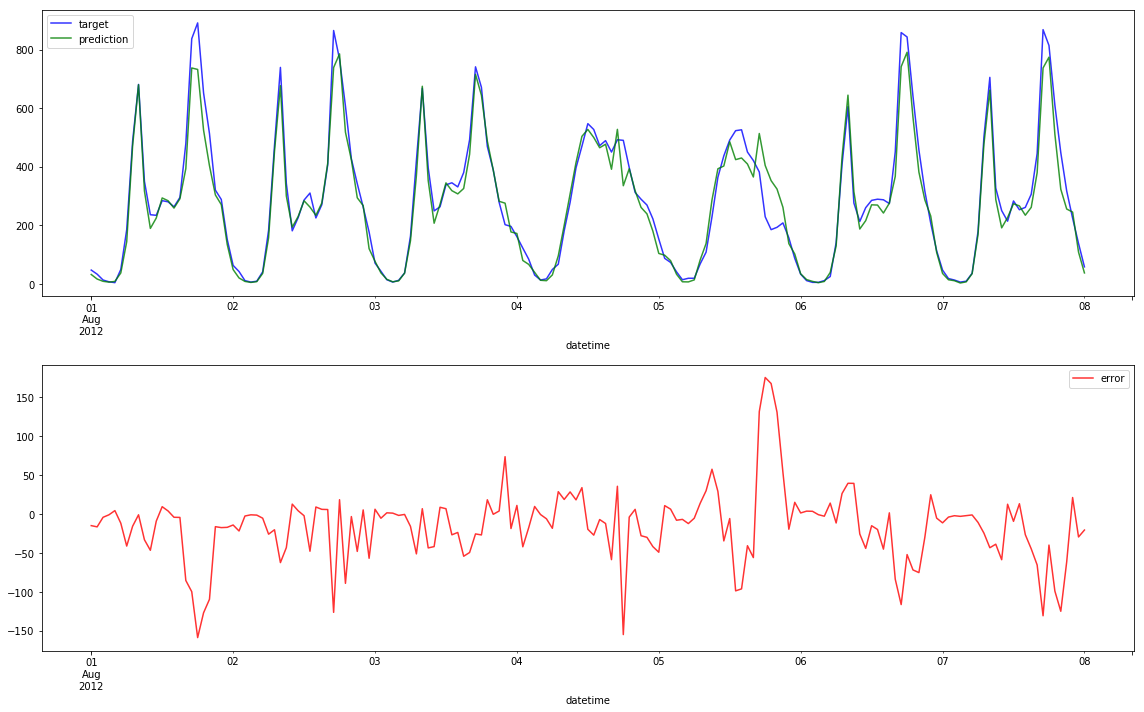

In [47]:
from sklearn.ensemble import RandomForestRegressor

# load and prepare data
df = load_and_prepare_data()

# drop columns
cols = ['holiday', 'workingday', 
        'weather', 'atemp', 'humidity', 
        'windspeed', 'casual', 'registered']
df.drop(columns=cols, inplace=True)

# feature engineering
df = add_hours(df)
df = add_isodate(df)
df = add_month(df)

# transfrom to fix skewed data
df['target'] = np.log(df.target)

# generate dummies
cols = ['hour', 'year', 'week', 'weekday', 'month', 'season']
df = generate_dummies(df, cols)

# split target and feature
X = df.loc[:, df.columns != 'target']
y = df.loc[:, ['target']]

# save predictions in dataframe
preds = pd.DataFrame()

# start forward test. pick date interval for train and test
start = pd.Timestamp('2012-08-01')
end = start + pd.Timedelta(7, unit='D')

# select train and test data
X_train = X[X.index < start]
X_test = X[(X.index >= start) & (X.index <= end)]

y_train = y[y.index < start]
y_test = y[(y.index >= start) & (y.index <= end)]

sc, y_train, y_test = scale_targets(y_train, y_test)
X_train, X_test = scale_feature(X_train, X_test, 'temp')

reg = RandomForestRegressor()
reg.fit(X_train, y_train[['target_sc']])

pred = reg.predict(X_test)

# add pred to y_test
y_test['prediction_sc'] = pred

# rescale and retransfrom predictions
y_test['prediction'] = sc.inverse_transform(y_test[['prediction_sc']])
y_test['target'] = np.exp(y_test.target)
y_test['prediction'] = np.exp(y_test.prediction)

mape = calculate_mape(y_test.target, y_test.prediction)
print(mape)

plot_error(y_test)

Great the performance for this one week improved again from `16.94` to `15.22`.

### Data Science Hypothesis Cycle 4 - Your ideas

Now it's time for you to be creative. You can now try your own ideas. There are a lot of features we haven't tried yet like the holiday feature or the humidity feature. 

But you can also come up with self designed features. Earlier we used the season feature because we saw that the spring season has lower bike rental counts. We included the default season feature with all four seasons but you could engineer a more specific feature which contains the information if it is spring season or not (new column named "spring". 0 - not spring; 1 - spring). Maybe the model can make use of this more specific feature. 

If you want, you can also implement the forward-testing method to test if the ML model and all the features you added improve other weeks and time intervals too or if we just picked a lucky time intervall where all features improve the model.

Keep in mind to either generate dummy variables if you are dealing with categorical features or to scale the data after splitting it into training and testings sets if you have numerical features.

Have fun!

## Summary and Outlook
You build a complete project from scratch. Not only did you explore and clean the data but you also engineered features and implemented a machine learning model which is trained, tested and evaluated.

This notebook was supposed to be a short introduction on how you can combine all the things you learnt so far to start your own data science (machine learning) projects.

Keep in mind that the steps for other problems like classification problems or regression problems which are not forecasts can vary. But now you should know what questions to ask, like what is the best way to scale the data? How should I split my data? What is the best approach to evaluate my model?

If you found the hypothesis process useful, use it in your own projects. If something is missing or to much, please iterate on the idea and change it so that it suits your work style.

The next steps from here on can include:
- buidling the forward-testing method to truely test how your model is performing.
- creating external .py files where you store all your functions, which you implement in the notebook here. External .py files will make it easier for you to share your code, make your code more production ready and work more efficient in teams.

Let me know if you have interest in bringing this notebook and code structure to production by implementing all the functions inside .py files and creating a useful project-folder-system or if you want to know how to implement the forward-testing method.